In [9]:
import pandas as pd
import numpy as np

#used to visualize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',FutureWarning)

In [10]:
arparams = np.array([0 ])
maparams = np.array([np.random.uniform(0, .5)])
arma_process = sm.tsa.ArmaProcess.from_coeffs(arparams, maparams)
ts = arma_process.generate_sample(100)
x = range(0,len(ts))


In [11]:
def time_series_plot(ts,x):
    fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,5))
    sns.lineplot(x = x, y = ts, ax=ax1)
    sm.graphics.tsa.plot_acf(ts,lags =20, ax = ax2)
    sm.graphics.tsa.plot_pacf(ts, lags=20, method="ywm", ax = ax3);

In [31]:
def evaluate_residuals(ts,order):
    ar_model = ARIMA(ts, order = order)
    ar_model_fit = ar_model.fit()
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize = (20,5))
    sns.scatterplot(x = range(0,len(ar_model_fit.resid)), y = ar_model_fit.resid, ax=ax1)
    sns.distplot(ar_model_fit.resid, ax=ax2)
    sm.graphics.tsa.plot_acf(ar_model_fit.resid,lags =20, ax = ax3)
    sm.graphics.tsa.plot_pacf(ar_model_fit.resid, lags=20, ax = ax4);

In [32]:
#p_values = range(0,3)
#d_values = range(0,3)
#q_values = range(0,7)

def evaluate_time_series(ts,p_values,d_values,q_values):
    fitted_model_aic = {}
    fitted_model_mse = {}
    fitted_model_pvalues ={}

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
       
            try:
                ar_model = ARIMA(ts, order = (order))
                ar_model_fit = ar_model.fit()
                fitted_model_aic[order]=ar_model_fit.aic
                fitted_model_pvalues[order]=ar_model_fit.pvalues[0]
            
                yhat = ar_model_fit.predict()
                mse = mean_squared_error(ts,yhat)
                fitted_model_mse[order]=mse
            
                fig,ax = plt.subplots(figsize = (15,4))
                plt.plot(ts)
                plt.plot(ar_model_fit.fittedvalues)
                plt.title('ARMA Fit {}  AIC Score {}  MSE {}' .format(order, round(ar_model_fit.aic,2) ,round(mse,2)))
            except:
                continue
    
    min_value = min(fitted_model_mse.values())
    print('Best MSE',{key:value for key, value in fitted_model_mse.items() if value == min_value})
    
    min_value = min(fitted_model_aic.values())
    print('Best AIC',{key:value for key, value in fitted_model_aic.items() if value == min_value})
    
    min_value = min(fitted_model_pvalues.values())
    print('Best p-value',{key:value for key, value in fitted_model_pvalues.items() if value == min_value})

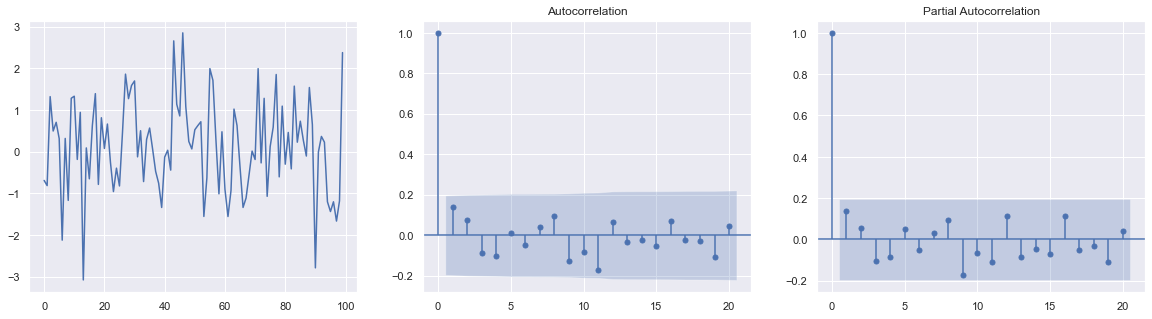

In [33]:
time_series_plot(ts,x)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best MSE {(2, 0, 3): 1.150952097109372}
Best AIC {(1, 0, 3): 309.9129204141053}
Best p-value {(1, 0, 3): 0.00024852657890075524}


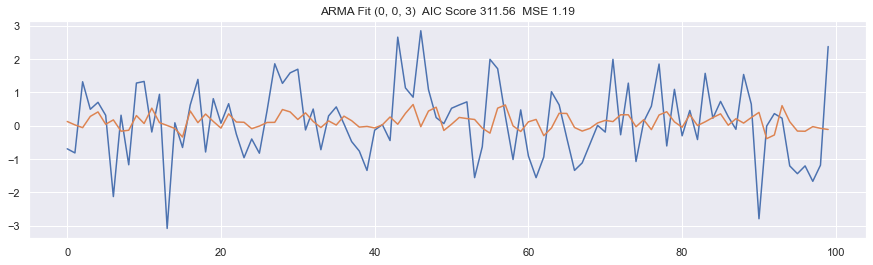

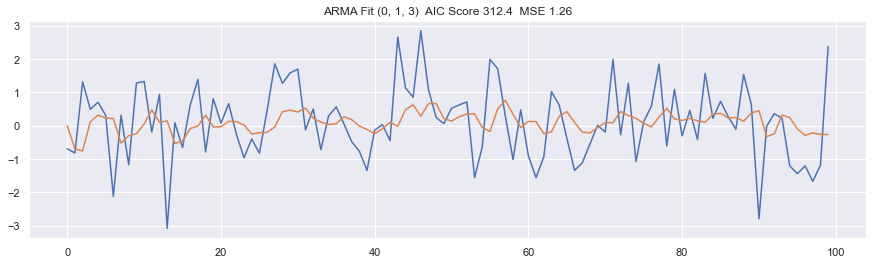

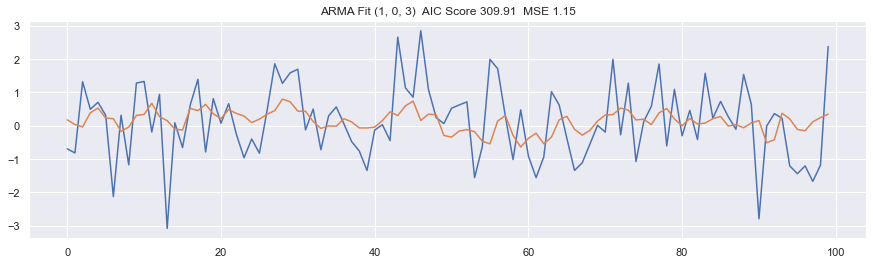

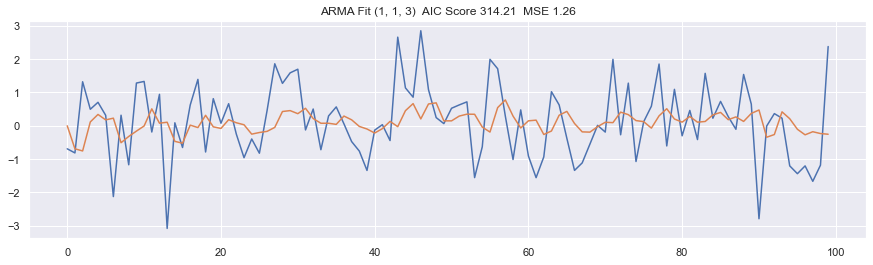

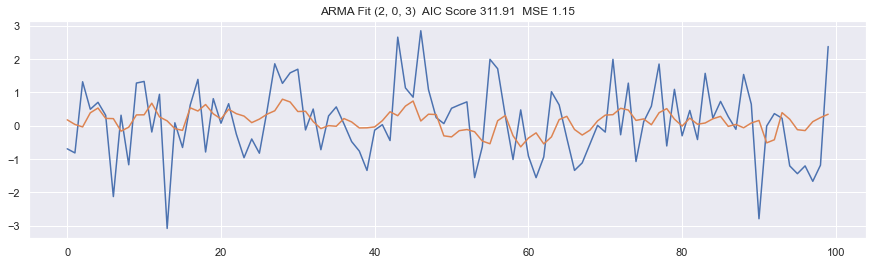

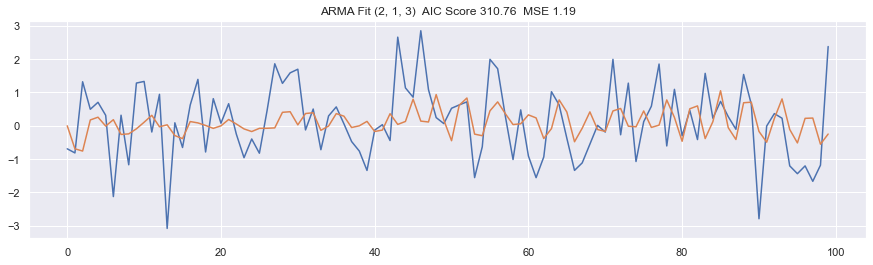

In [34]:
p_values = range(0,3)
d_values = range(0,2)
q_values = range(0,4)

evaluate_time_series(ts,p_values,d_values,q_values)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


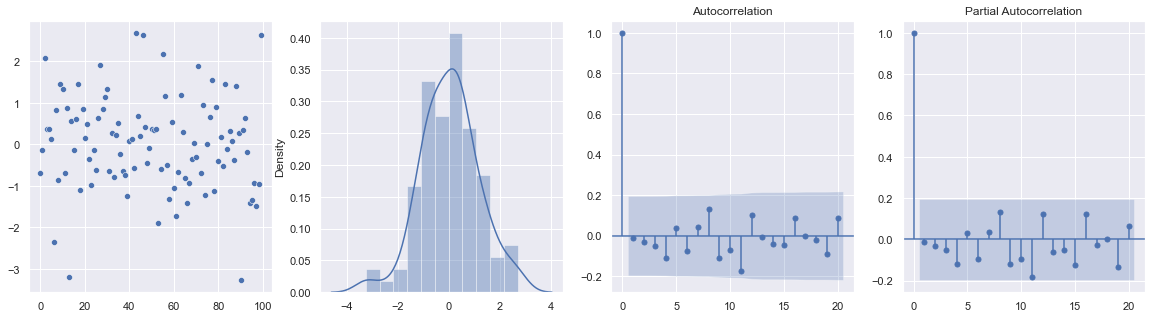

In [36]:
evaluate_residuals(ts, (1,1,3))